In [82]:
import pandas as pd 
import numpy as np
import os
import json
import tweepy
import requests
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

- Phase one: Data Gathering

In [83]:
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')

Request to download image_predictions

In [84]:
Url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(Url)
with open ("image_predictions.tsv", mode ='wb') as file:
    file.write(req.content)

In [85]:
image_dogs_predictions = pd.read_csv("image_predictions.tsv",sep='\t')

In [86]:
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [87]:
image_dogs_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [88]:
# using the folowing with my data(key and consumer_secret) .
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

In [89]:
data_tweets_ids = twitter_archive_data.tweet_id.values
len(data_tweets_ids)

2356

In [90]:
# to extract JSON data for each tweet ID in the archive of Twitter Using Twitter's API
# and Save every returned JSON of tweet in file(.txt) 
failDict = {}
fail_count =0
if not os.path.exists('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        for tweety_id in data_tweets_ids:
            fail_count = fail_count + 1
            try:
                tweet = api.get_status(tweety_id,wait_on_rate_limit =True,wait_on_rate_limit_notify = True,tweet_mode='extended')
                json.dump(tweet._json, outfile)
                outfile.write('\n')
                print(fail_count , " : Done Successfully ")
            except tweepy.TweepError as e:
                failDict[tweety_id] = e
                print(fail_count , " : obs! Fail")
                pass
print(failDict)

{}


In [91]:
len(failDict)

0

In [92]:

data_json = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    for li in json_file:
        element = json.loads(li)
        tweet_id = element['id']
        tweet_txt = element['full_text']
        url = tweet_txt[tweet_txt.find('https'):]
        favorite_count = element['favorite_count']
        retweet_count = element['retweet_count']
        retweeted_status = element['retweeted_status'] = element.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        data_json.append({'tweet_id': str(tweet_id),
                             'tweet_txt':tweet_txt,
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'retweeted_status': retweeted_status,
                            })
        json_tweet = pd.DataFrame(data_json, columns = ['tweet_id','tweet_txt' ,'favorite_count','retweet_count',  
                                                           'retweeted_status', 'url'])

## Phase two: Assessing Data

- Visually -then-  Programaticly

many NAN values.

In [93]:
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [94]:
json_tweet

,tweet_id,tweet_txt,favorite_count,retweet_count,retweeted_status,url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,35019,7360,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,This is Tilly. She's just checking pup on you....,30332,5486,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,22802,3628,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,38303,7541,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,This is Franklin. He would like you to stop ca...,36572,8127,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...,...
2326,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,93,38,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,259,122,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,Here is a very happy pup. Big fan of well-main...,107,39,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,This is a western brown Mitsubishi terrier. Up...,118,41,Original tweet,https://t.co/r7mOb2m0UI


In [95]:
image_dogs_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Programatically

In [96]:
print(twitter_archive_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [97]:
twitter_archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [98]:
twitter_archive_data['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [99]:
twitter_archive_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [100]:
twitter_archive_data['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [101]:
#Checking tweets for wrong rating_denominator
twitter_archive_data[twitter_archive_data['rating_denominator'] != 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [102]:
twitter_archive_data[twitter_archive_data['rating_denominator'] != 10].shape


(23, 17)

In [103]:
twitter_archive_data[twitter_archive_data['rating_denominator'] != 10].tweet_id

313     835246439529840640
342     832088576586297345
433     820690176645140481
516     810984652412424192
784     775096608509886464
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1598    686035780142297088
1634    684225744407494656
1635    684222868335505415
1662    682962037429899265
1663    682808988178739200
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

In [104]:
#countinue N/D to be 10
invaild_ids = twitter_archive_data[twitter_archive_data['rating_denominator'] != 10].tweet_id.index
for id in range(len(invaild_ids)):
    print(invaild_ids[id],":",twitter_archive_data.text[invaild_ids[id]])
    print("\n")

313 : @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


342 : @docmisterio account started on 11/15/15


433 : The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


516 : Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


784 : RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…


902 : Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


1068 : After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


1120 : Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


1165 : Happy 4/20 from the squad! 13/10 for

In [105]:
invaild_ids_index = twitter_archive_data[twitter_archive_data['rating_numerator'] > 18][twitter_archive_data['rating_denominator'] == 10].tweet_id.index
  
for id in range(len(invaild_ids_index)):
    print(invaild_ids_index[id],":",twitter_archive_data.text[invaild_ids_index[id]])
    print("\n")

188 : @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research


189 : @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10


290 : @markhoppus 182/10


340 : RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…


695 : This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS


763 : This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq


979 : This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


1712 : Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


2074 : After so many requests... here you go.

Good dogg. 420/10 https://t.co

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [106]:
image_dogs_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [107]:
image_dogs_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [108]:
image_dogs_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


   ### check num of duplicated jpg_url

In [109]:
sum(image_dogs_predictions.jpg_url.duplicated())

66

In [110]:
image_dogs_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [111]:
notDogType = image_dogs_predictions[image_dogs_predictions['p1_dog'] == False][image_dogs_predictions['p2_dog'] == False][image_dogs_predictions['p3_dog'] == False]
notDogType

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [112]:
json_tweet

,tweet_id,tweet_txt,favorite_count,retweet_count,retweeted_status,url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,35019,7360,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,This is Tilly. She's just checking pup on you....,30332,5486,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,22802,3628,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,38303,7541,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,This is Franklin. He would like you to stop ca...,36572,8127,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...,...
2326,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,93,38,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,259,122,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,Here is a very happy pup. Big fan of well-main...,107,39,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,This is a western brown Mitsubishi terrier. Up...,118,41,Original tweet,https://t.co/r7mOb2m0UI


In [113]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   tweet_txt         2331 non-null   object
 2   favorite_count    2331 non-null   int64 
 3   retweet_count     2331 non-null   int64 
 4   retweeted_status  2331 non-null   object
 5   url               2331 non-null   object
dtypes: int64(2), object(4)
memory usage: 109.4+ KB


In [114]:
json_tweet.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7313.635350,2589.347490
std,11359.936727,4380.094231
min,0.000000,1.000000
25%,1268.000000,525.000000
50%,3174.000000,1207.000000
75%,8943.500000,2998.000000
max,150564.000000,74314.000000


In [115]:
json_tweet['favorite_count'].value_counts()

0        163
431        3
2008       3
673        3
1308       3
        ... 
5376       1
1278       1
1280       1
27895      1
12272      1
Name: favorite_count, Length: 1996, dtype: int64

In [116]:
#counte how many retweets to be removed
json_tweet['retweeted_status'].value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [117]:
json_tweet[json_tweet['retweeted_status']=='This is a retweet']

,tweet_id,tweet_txt,favorite_count,retweet_count,retweeted_status,url
31,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,0,96,This is a retweet,This is a retweet
35,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,0,16158,This is a retweet,This is a retweet
67,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,0,5977,This is a retweet,This is a retweet
72,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,0,1119,This is a retweet,This is a retweet
73,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,0,5802,This is a retweet,This is a retweet
...,...,...,...,...,...,...
999,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,0,941,This is a retweet,This is a retweet
1019,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,0,1980,This is a retweet,This is a retweet
1218,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,0,123,This is a retweet,This is a retweet
2234,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,0,30,This is a retweet,This is a retweet


# Define
## first: Quality issues

  ### twitter_archive_data:
- Drop retweets of retweeted_status_user_id by filtering the NaN
- alot of nan values in many columns:in in_reply_to_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id and retweeted_status_id.
- split time column into 3 after changing its type from string 
- cleaning the source text column form tage of html
- drop exetrem values and then Correct any Invalid values at rating_numerator 
    - Correct numerators with decimals
- drop exetrem values and then Correct any Invalid values at rating_denominator     
    - Manually (assessed individual by print text).
    - programarlly(any Tweets without denominator equal to 10 is a multiple dogs).
- convert float numerator_rating

  ### json_tweet:
- Drop any retweets

  ### image_dogs_predictions:
- Removing any retweets which will turn retweeted_status column into valueless column.
- Drop duplicated jpg_url 
- Create 2 columns:one for confidence level and another for dog image prediction  
  

## second: Tidiness issues
- turn type of tweet_id into int64 to be ready to marge with the other two tables 
- create column for dog stage which out of merging four columns: floofer, puppo, doggo and pupper  
- finally, Merge the three datasets into one.


# Phase 3 :Data cleaning

- Make a copy of the original data set before doing anything 

In [118]:
twitter_archive_data_clean = twitter_archive_data.copy()
image_dogs_predict_clean = image_dogs_predictions.copy()
json_tweet_clean = json_tweet.copy()

# define N.1
- Drop retweets of retweeted_status_user_id by filtering the NaN

## Code

In [119]:
twitter_archive_data_clean.shape

(2356, 17)

In [120]:
print(sum(twitter_archive_data_clean.retweeted_status_user_id.value_counts()))

181


In [121]:
twitter_archive_data_clean = twitter_archive_data_clean[pd.isnull(twitter_archive_data_clean['retweeted_status_user_id'])]

# Test

In [122]:
#TEST :chech the sum num. of the not null values
print(sum(twitter_archive_data_clean.retweeted_status_user_id.value_counts()))

0


# define N.2
- Alot of nan values in many columns that won't help for analysis
- so,Drop them: 'source',in_reply_to_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id and retweeted_status_id , 'expanded_urls'
                                                   
                                                   

## Code

In [123]:
twitter_archive_data_clean = twitter_archive_data_clean.drop(['in_reply_to_status_id','retweeted_status_id',
                                                       'in_reply_to_user_id',
                                                       'retweeted_status_user_id','expanded_urls','retweeted_status_timestamp'
                                                      ], axis= 1)

## Test

In [124]:
#for test
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


# define N.3
- split time column into 3 (year, month, day) after changing its type from string 
 

## code

In [125]:
twitter_archive_data_clean['timestamp'] = pd.to_datetime(twitter_archive_data_clean['timestamp'])

twitter_archive_data_clean['year'] = twitter_archive_data_clean['timestamp'].dt.year
twitter_archive_data_clean['month'] = twitter_archive_data_clean['timestamp'].dt.month
twitter_archive_data_clean['day'] = twitter_archive_data_clean['timestamp'].dt.day

twitter_archive_data_clean = twitter_archive_data_clean.drop('timestamp', axis=1)

## Test

In [126]:
#Test
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   source              2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
 10  year                2175 non-null   int64 
 11  month               2175 non-null   int64 
 12  day                 2175 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 237.9+ KB


# define N.4
 
- cleaning the source text column form tage of html

## Code

In [127]:
twitter_archive_data_clean['source'] = twitter_archive_data_clean['source'].str.split('"')
for t in range((twitter_archive_data_clean.shape[0])):
    twitter_archive_data_clean['source'][t] = twitter_archive_data_clean['source'].values[t][1]

#twitter_archive_clean['source'] = twitter_archive_enhanced['source'].str.split('=')
#for i in range((twitter_archive_clean.shape[0])-len(twitter_archive_clean['source'].values)):
 #   twitter_archive_clean['source'][len(twitter_archive_clean['source'].values)+i] = twitter_archive_clean['source'].str.split('=').values[len(twitter_archive_clean['source'].values)+i][1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Test

In [128]:
# test
twitter_archive_data_clean['source']

0                      http://twitter.com/download/iphone
1                      http://twitter.com/download/iphone
2                      http://twitter.com/download/iphone
3                      http://twitter.com/download/iphone
4                      http://twitter.com/download/iphone
                              ...                        
2351    [<a href=, http://twitter.com/download/iphone,...
2352    [<a href=, http://twitter.com/download/iphone,...
2353    [<a href=, http://twitter.com/download/iphone,...
2354    [<a href=, http://twitter.com/download/iphone,...
2355    [<a href=, http://twitter.com/download/iphone,...
Name: source, Length: 2175, dtype: object

In [129]:
twitter_archive_data_clean.tail()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
2351,666049248165822465,"[<a href=, http://twitter.com/download/iphone,...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None,2015,11,16
2352,666044226329800704,"[<a href=, http://twitter.com/download/iphone,...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None,2015,11,16
2353,666033412701032449,"[<a href=, http://twitter.com/download/iphone,...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None,2015,11,15
2354,666029285002620928,"[<a href=, http://twitter.com/download/iphone,...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None,2015,11,15
2355,666020888022790149,"[<a href=, http://twitter.com/download/iphone,...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None,None,None,None,2015,11,15


In [130]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   source              2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
 10  year                2175 non-null   int64 
 11  month               2175 non-null   int64 
 12  day                 2175 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 302.4+ KB


## Define N.5
- change numerator data type to float going that to support decimals



## Code

In [131]:
twitter_archive_data_clean = twitter_archive_data_clean.astype({'rating_numerator': 'float64', 'rating_denominator': 'float64'})

## Test

In [132]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   source              2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                2175 non-null   object 
 6   doggo               2175 non-null   object 
 7   floofer             2175 non-null   object 
 8   pupper              2175 non-null   object 
 9   puppo               2175 non-null   object 
 10  year                2175 non-null   int64  
 11  month               2175 non-null   int64  
 12  day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 302.4+ KB


# define N.6



- drop exetrem values and then Correct any Invalid values at rating_numerator 
    - Correct numerators with decimals
- drop exetrem values and then Correct any Invalid values at rating_denominator     
    - Manually (assessed individual by print text).
    - programarlly(any Tweets without denominator equal to 10 is a multiple dogs).
- convert float numerator_rating    
    
    
- Correct any Invalid values of rating_numerator which had been gotten Manually


## Code

In [133]:
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5

## Test

In [134]:
with pd.option_context('max_colwidth',150):
    display(twitter_archive_data_clean[twitter_archive_data_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


# define N.7

- Correct denominators values

In [135]:
twitter_archive_data_clean.loc[313]

tweet_id                                             835246439529840640
source                               http://twitter.com/download/iphone
text                  @jonnysun @Lin_Manuel ok jomny I know you're e...
rating_numerator                                                  960.0
rating_denominator                                                  0.0
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
year                                                               2017
month                                                                 2
day                                                                  24
Name: 313, dtype: object

In [136]:
#required
required_fix = {"313":[13 , 10],"433":[12,10],"784":[14,10],"340":[9.75,10],
                "902":[11,10],"1068":[14,10],"1165":[13,10],"695":[9.75,10],
                "1202":[11,10],"1228":[11,10],"1254":[10,10],"763":[11.27,1],
                "1351":[12,10],"1433":[11,10],"1598":[2,10],"1634":[11,10],
                "1635":[11,10],"1662":[10,10],"1779":[12,10],"1843":[11,10],
                "2335":[9,10],"1712":[11.26,10]}
drop_that_rate = [340,516,1120,1274,1663]
drop_that_ratet = [188,189,290,2074,979]

## Code
- drop exetrem values and no rating tweets

In [137]:
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_data_clean.loc[(twitter_archive_data_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#Delete five tweets with no actual ratings
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean['tweet_id'] != 832088576586297345]
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean['tweet_id'] != 810984652412424192]
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean['tweet_id'] != 682808988178739200]
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean['tweet_id'] != 835246439529840640]
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean['tweet_id'] != 686035780142297088]

### Test

In [138]:
with pd.option_context('max_colwidth',150):
    display(twitter_archive_data_clean[twitter_archive_data_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


#### Programatically

- tweets without denominator equal to 10 are multiple dogs.
(- programarlly(any Tweets without denominator equal to 10 is a multiple dogs).)
Like , tweet_id 713900603437621000 has numerator and denominators (99/90) because 9 dogs are there in picture https://t.co/mpvaVxKmc1.

In [139]:
twitter_archive_data_clean['rating'] = 10 * twitter_archive_data_clean['rating_numerator'] / twitter_archive_data_clean['rating_denominator'].astype(float)

### Test

In [140]:
twitter_archive_data_clean.loc[1843]

tweet_id                                             675853064436391936
source                               http://twitter.com/download/iphone
text                  Here we have an entire platoon of puppers. Tot...
rating_numerator                                                   88.0
rating_denominator                                                 80.0
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
year                                                               2015
month                                                                12
day                                                                  13
rating                                                          

In [141]:
twitter_archive_data_clean.sample(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rating
351,831322785565769729,http://twitter.com/download/iphone,This is Pete. He has no eyes. Needs a guide do...,12.0,10.0,Pete,doggo,None,None,None,2017,2,14,12.0
1482,693267061318012928,http://twitter.com/download/iphone,This is Oscar. He can wave. Friendly af. 12/10...,12.0,10.0,Oscar,None,None,None,None,2016,1,30,12.0
1316,706644897839910912,http://twitter.com/download/iphone,Meet Shadow. She's tired of the responsibiliti...,9.0,10.0,Shadow,None,None,None,None,2016,3,7,9.0
2031,671768281401958400,http://twitter.com/download/iphone,When you try to recreate the scene from Lady &...,10.0,10.0,None,None,None,None,None,2015,12,1,10.0
1243,711968124745228288,http://twitter.com/download/iphone,Meet Winston. He's trapped in a cup of coffee....,10.0,10.0,Winston,None,None,pupper,None,2016,3,21,10.0


##  json_tweet: file
## define N. 8
- Drop any retweets and drop retweeted status columns


### Code

In [142]:
json_tweet_clean['retweeted_status'].value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [143]:
json_tweet_clean = json_tweet_clean[json_tweet['retweeted_status'] == 'Original tweet']

In [144]:
#Test
json_tweet_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [145]:
json_tweet_clean.drop(['retweeted_status'],inplace=True, axis=1)

### TEST

In [146]:
json_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2168 non-null   object
 1   tweet_txt       2168 non-null   object
 2   favorite_count  2168 non-null   int64 
 3   retweet_count   2168 non-null   int64 
 4   url             2168 non-null   object
dtypes: int64(2), object(3)
memory usage: 101.6+ KB


# image_dogs_prediction

- Removing any retweets which will turn retweeted_status column into valueless column.
- Drop duplicated jpg_url 
- Create 2 columns:one for confidence level and another for dog image prediction  

## Define N.9
- Drop 66 duplicated jpg_url 

### Code

In [147]:
image_dogs_predict_clean = image_dogs_predict_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [148]:
# Test
sum(image_dogs_predict_clean['jpg_url'].duplicated())

0

### define N.10
- Create 2 columns:one for confidence level and another for dog image prediction

### Code

In [149]:
typeOfDog =[]
confidenceList  = []

# using nested if to create a function to capture dog type and level confidence 
# from first 'true' predict

def imagePro(image_dogs_predict_clean):
    if image_dogs_predict_clean['p1_dog'] == True:
        typeOfDog.append(image_dogs_predict_clean['p1'])
        confidenceList.append(image_dogs_predict_clean['p1_conf'])
    elif image_dogs_predict_clean['p2_dog'] == True:
        typeOfDog.append(image_dogs_predict_clean['p2'])
        confidenceList.append(image_dogs_predict_clean['p2_conf'])
    elif image_dogs_predict_clean['p3_dog'] == True:
        typeOfDog.append(image_dogs_predict_clean['p3'])
        confidenceList.append(image_dogs_predict_clean['p3_conf'])
    else:
        typeOfDog.append('Error happened')
        confidenceList.append('Error happened')

In [150]:
image_dogs_predict_clean.apply(imagePro, axis=1)
image_dogs_predict_clean['typeOfDog'] = typeOfDog
image_dogs_predict_clean['confidence'] = confidenceList
image_dogs_predict_clean = image_dogs_predict_clean[image_dogs_predict_clean['typeOfDog'] != 'Error happened']

In [151]:
# test
image_dogs_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   int64  
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   p1          1691 non-null   object 
 4   p1_conf     1691 non-null   float64
 5   p1_dog      1691 non-null   bool   
 6   p2          1691 non-null   object 
 7   p2_conf     1691 non-null   float64
 8   p2_dog      1691 non-null   bool   
 9   p3          1691 non-null   object 
 10  p3_conf     1691 non-null   float64
 11  p3_dog      1691 non-null   bool   
 12  typeOfDog   1691 non-null   object 
 13  confidence  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [152]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2170 non-null   int64  
 1   source              2170 non-null   object 
 2   text                2170 non-null   object 
 3   rating_numerator    2170 non-null   float64
 4   rating_denominator  2170 non-null   float64
 5   name                2170 non-null   object 
 6   doggo               2170 non-null   object 
 7   floofer             2170 non-null   object 
 8   pupper              2170 non-null   object 
 9   puppo               2170 non-null   object 
 10  year                2170 non-null   int64  
 11  month               2170 non-null   int64  
 12  day                 2170 non-null   int64  
 13  rating              2170 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 318.8+ KB




### Define N.11
- Drop columns which won't help in analysis

### Code

In [153]:
image_dogs_predict_clean = image_dogs_predict_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog','p3_dog', 
                                                      'p2', 'p2_conf', 'p3_conf',
                                                      'p2_dog', 'p3'] , 1)
                                                      

In [154]:
# TEST
image_dogs_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1691 non-null   int64 
 1   jpg_url     1691 non-null   object
 2   typeOfDog   1691 non-null   object
 3   confidence  1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


# Tidiness issues

### Define N.12
- create column for dog stage which out of merging four columns: floofer, puppo, doggo and pupper
- Then drop dogs.


### Code

In [155]:
# First replace None in stage columns with empty string as follows.

twitter_archive_data_clean.floofer.replace('None', '', inplace=True)
twitter_archive_data_clean.doggo.replace('None', '', inplace=True)
twitter_archive_data_clean.puppo.replace('None', '', inplace=True)
twitter_archive_data_clean.pupper.replace('None', '', inplace=True)

In [156]:
# Then combine stage columns.
twitter_archive_data_clean['dog_stage'] = twitter_archive_data_clean.doggo+ twitter_archive_data_clean.floofer+ twitter_archive_data_clean.pupper + twitter_archive_data_clean.puppo

In [157]:
#twitter_archive_data_clean.dog_stage.replace(',,,', np.nan, inplace=True)

# Then format entries with multiple dog stages which appeared like doggopupper.
twitter_archive_data_clean.loc[twitter_archive_data_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_data_clean.loc[twitter_archive_data_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_data_clean.loc[twitter_archive_data_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


In [158]:
twitter_archive_data_clean.drop(['floofer','pupper', 'puppo', 'doggo' ], axis=1, inplace=True)

In [159]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2170 non-null   int64  
 1   source              2170 non-null   object 
 2   text                2170 non-null   object 
 3   rating_numerator    2170 non-null   float64
 4   rating_denominator  2170 non-null   float64
 5   name                2170 non-null   object 
 6   year                2170 non-null   int64  
 7   month               2170 non-null   int64  
 8   day                 2170 non-null   int64  
 9   rating              2170 non-null   float64
 10  dog_stage           2170 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 268.0+ KB


In [160]:
twitter_archive_data_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_stage
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,13.0,
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,13.0,
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,12.0,
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,13.0,
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,12.0,


## Define N.13
 - turn type of tweet_id into int64 to be ready to marge with the other two tables


### Code

In [161]:
json_tweet_clean = json_tweet_clean.astype({'tweet_id': 'int64'})

### TEST


In [162]:
json_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2168 non-null   int64 
 1   tweet_txt       2168 non-null   object
 2   favorite_count  2168 non-null   int64 
 3   retweet_count   2168 non-null   int64 
 4   url             2168 non-null   object
dtypes: int64(3), object(2)
memory usage: 101.6+ KB


## Define N.14 
- finally, Merge the three datasets into one.
 ### code

In [163]:
#merging tables
twitter_arc_master = pd.merge(twitter_archive_data_clean, image_dogs_predict_clean, how = 'left', on = ['tweet_id'])
twitter_arc_master = pd.merge(twitter_arc_master, json_tweet_clean, how = 'left', on = ['tweet_id'])

In [164]:
twitter_arc_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2170 non-null   int64  
 1   source              2170 non-null   object 
 2   text                2170 non-null   object 
 3   rating_numerator    2170 non-null   float64
 4   rating_denominator  2170 non-null   float64
 5   name                2170 non-null   object 
 6   year                2170 non-null   int64  
 7   month               2170 non-null   int64  
 8   day                 2170 non-null   int64  
 9   rating              2170 non-null   float64
 10  dog_stage           2170 non-null   object 
 11  jpg_url             1625 non-null   object 
 12  typeOfDog           1625 non-null   object 
 13  confidence          1625 non-null   object 
 14  tweet_txt           2163 non-null   object 
 15  favorite_count      2163 non-null   float64
 16  retwee

In [165]:
twitter_arc_master.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_stage,jpg_url,typeOfDog,confidence,tweet_txt,favorite_count,retweet_count,url
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,13.0,,NaN,NaN,NaN,This is Phineas. He's a mystical boy. Only eve...,35019.0,7360.0,https://t.co/MgUWQ76dJU
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,13.0,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,This is Tilly. She's just checking pup on you....,30332.0,5486.0,https://t.co/0Xxu71qeIV
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,12.0,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,This is Archie. He is a rare Norwegian Pouncin...,22802.0,3628.0,https://t.co/wUnZnhtVJB
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,13.0,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,This is Darla. She commenced a snooze mid meal...,38303.0,7541.0,https://t.co/tD36da7qLQ
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,12.0,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,This is Franklin. He would like you to stop ca...,36572.0,8127.0,https://t.co/AtUZn91f7f


In [179]:
#change the data type of tweet_id to object type.

twitter_arc_master = twitter_arc_master.astype({'tweet_id': 'object'})

In [180]:
twitter_arc_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2170 non-null   object 
 1   source              2170 non-null   object 
 2   text                2170 non-null   object 
 3   rating_numerator    2170 non-null   float64
 4   rating_denominator  2170 non-null   float64
 5   name                2170 non-null   object 
 6   year                2170 non-null   int64  
 7   month               2170 non-null   int64  
 8   day                 2170 non-null   int64  
 9   rating              2170 non-null   float64
 10  dog_stage           2170 non-null   object 
 11  jpg_url             1625 non-null   object 
 12  typeOfDog           1625 non-null   object 
 13  confidence          1625 non-null   object 
 14  tweet_txt           2163 non-null   object 
 15  favorite_count      2163 non-null   float64
 16  retwee

# save the clean data into CSV File

In [181]:
twitter_arc_master.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

# phase 4: Data Analysis

####  A) which is the most popular dog type?!
- golden_retriever 
- Labrador_retriever
- Pembroke                 
- Chihuahua              
- pug    

In [182]:
twitter_arc_master['typeOfDog'].value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
silky_terrier             1
Irish_wolfhound           1
Bouvier_des_Flandres      1
clumber                   1
Scotch_terrier            1
Name: typeOfDog, Length: 113, dtype: int64

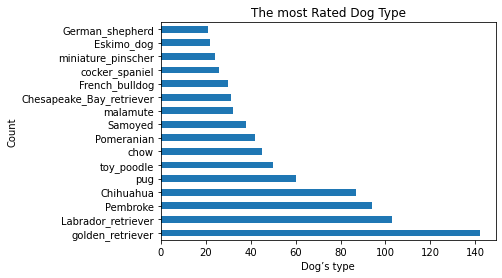

In [183]:
df_typeOfDog = twitter_arc_master.groupby('typeOfDog').filter(lambda x: len(x) > 20)

x =df_typeOfDog["typeOfDog"].value_counts() 

x.plot(kind = 'barh')
plt.title('The most Rated Dog Type')
plt.xlabel('Dog’s type')
plt.ylabel('Count')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output.png',bbox_inches='tight');

#### B)
#### which has the the lowest average rating ?!
#### which has the the highest average rating ?!
- the lowest average rating: Japanese_spaniel
- the highest average rating: Bouvier_des_Flandres


In [184]:
df_typeOfDog_mean = twitter_arc_master.groupby('typeOfDog').mean()


In [185]:
df_typeOfDog_sorted = df_typeOfDog_mean['rating'].sort_values()
df_typeOfDog_sorted

typeOfDog
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
Border_terrier                 12.142857
Irish_setter                   12.333333
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

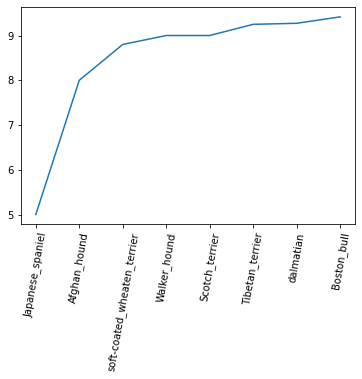

In [186]:
plt.plot(df_typeOfDog_sorted.head(8))
plt.xticks(rotation=80);

fig_plot = plt.gcf()
fig_plot.savefig('fig_plot_output2.png',bbox_inches='tight');

In [187]:
df_typeOfDog_mean = twitter_arc_master.groupby('typeOfDog').sum()[['favorite_count','retweet_count']]
df_typeOfDog_mean

,favorite_count,retweet_count
typeOfDog,,
Afghan_hound,21520.0,6005.0
Airedale,55942.0,14077.0
American_Staffordshire_terrier,111973.0,25984.0
Appenzeller,12983.0,2409.0
Australian_terrier,19753.0,5227.0
...,...,...
toy_poodle,279955.0,91290.0
toy_terrier,8400.0,2094.0
vizsla,86067.0,21762.0


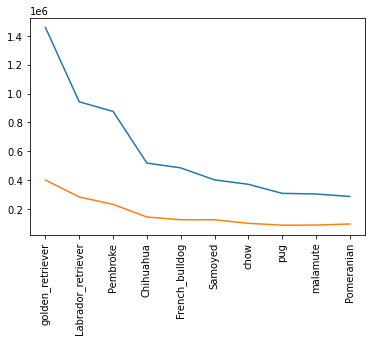

In [188]:
df_typeOfDog_mean.sort_values(by='favorite_count',ascending=False, inplace=True)
plt.plot(df_typeOfDog_mean.head(10))
plt.xticks(rotation=90);

fig_plot = plt.gcf()
fig_plot.savefig('fig_plot_output3.png',bbox_inches='tight');

In [189]:
df_typeOfDog_mean.head(10)

,favorite_count,retweet_count
typeOfDog,,
golden_retriever,1458541.0,400981.0
Labrador_retriever,943161.0,283277.0
Pembroke,876725.0,232269.0
Chihuahua,518613.0,144393.0
French_bulldog,485069.0,125522.0
Samoyed,402063.0,125772.0
chow,371299.0,100745.0
pug,308503.0,87881.0
malamute,304134.0,88590.0


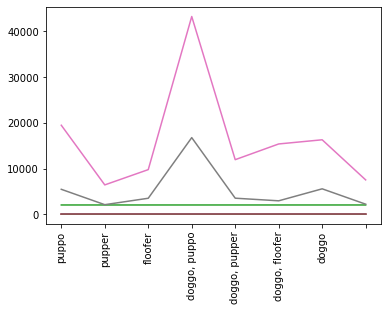

In [190]:
df_typeOfDog_mean = twitter_arc_master.groupby('dog_stage').mean()

df_typeOfDog_mean.sort_values(by='dog_stage',ascending=False, inplace=True)
plt.plot(df_typeOfDog_mean.head(10))
plt.xticks(rotation=90);

fig_plot = plt.gcf()
fig_plot.savefig('fig_plot_output5.png',bbox_inches='tight');

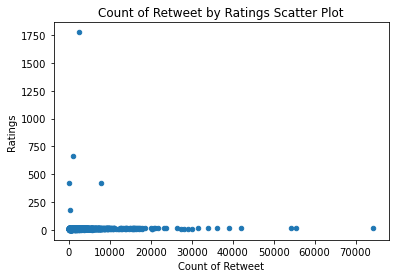

In [191]:
twitter_arc_master.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Count of Retweet')
plt.ylabel('Ratings')
plt.title('Count of Retweet by Ratings Scatter Plot')

fig_plot = plt.gcf()
fig_plot.savefig('fig_plot_output6.png',bbox_inches='tight')